# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import requests
import gmaps
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#get the weather data in imperial units--because, America clings to imperial units like a security blanket.
#after this many years its just sad
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
#Gonna need someplace to put the data,attempt to keep columns similar to original data pulled--my 'cute names' have burned me
#many many times now
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
#set variable to 1
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. if it fails, we don't want it to stop, just throw an error and keep going
#Try/except loop section
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|coihaique
Processing record 2|thompson
Processing record 3|ust-kut
Processing record 4|punta arenas
Processing record 5|avarua
Processing record 6|barrow
Processing record 7|yulara
Processing record 8|esperance
Processing record 9|jamestown
City not found. skipping.
Processing record 10|kruisfontein
Processing record 11|tiksi
Processing record 12|kaitangata
City not found. skipping.
Processing record 13|ushuaia
City not found. skipping.
Processing record 14|loikaw
Processing record 15|rikitea
Processing record 16|new norfolk
Processing record 17|komsomolskiy
Processing record 18|port alfred
Processing record 19|santa maria
Processing record 20|poum
Processing record 21|masallatah
Processing record 22|port elizabeth
Processing record 23|labuhan
Processing record 24|tasiilaq
Processing record 25|canico
Processing record 26|albany
Processing record 27|ribeira grande
Processing record 28|georgetown
Processing record 29|bluff
Processing record 30|roald
Processing record 

Processing record 251|palmer
Processing record 252|parauna
Processing record 253|hami
Processing record 254|katherine
Processing record 255|berdigestyakh
Processing record 256|ambovombe
Processing record 257|baturaja
Processing record 258|pedernales
Processing record 259|durazno
Processing record 260|vila franca do campo
Processing record 261|billings
Processing record 262|kaoma
City not found. skipping.
Processing record 263|kisanga
Processing record 264|cairns
Processing record 265|pisco
Processing record 266|faya
Processing record 267|nizhneudinsk
Processing record 268|port hawkesbury
City not found. skipping.
Processing record 269|raposa
Processing record 270|vostok
Processing record 271|araouane
Processing record 272|lhokseumawe
Processing record 273|kasongo-lunda
Processing record 274|asfi
Processing record 275|nicoya
Processing record 276|sosva
Processing record 277|liwale
Processing record 278|coolum beach
Processing record 279|stjordalshalsen
Processing record 280|chokurdakh
P

City not found. skipping.
Processing record 494|beloha
City not found. skipping.
Processing record 495|hobyo
Processing record 496|inhambane
Processing record 497|nara
Processing record 498|sheopur
Processing record 499|saint-raphael
Processing record 500|kamen-rybolov
Processing record 501|zavyalovo
Processing record 502|natchitoches
Processing record 503|limbang
Processing record 504|ilhabela
Processing record 505|mujiayingzi
Processing record 506|aasiaat
Processing record 507|shahr-e babak
Processing record 508|aktash
Processing record 509|sakaiminato
Processing record 510|acobamba
Processing record 511|gimli
Processing record 512|okhotsk
Processing record 513|nalbari
Processing record 514|namatanai
Processing record 515|budogoshch
Processing record 516|herat
Processing record 517|itoigawa
Processing record 518|tete
Processing record 519|xining
Processing record 520|chokwe
Processing record 521|dvinskoy
Processing record 522|lagos
Processing record 523|soure
Processing record 524|we

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Creating city dataframe
cities = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = cities.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("..//output_data//city.csv")

#Displaying dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Coyhaique,75,CL,1659472862,57,-45.5752,-72.0662,46.35,5.75
1,Thompson,100,CA,1659472940,88,55.7435,-97.8558,59.16,8.05
2,Ust'-Kut,100,RU,1659473097,98,56.7938,105.7672,59.74,10.09
3,Punta Arenas,100,CL,1659472847,87,-53.1500,-70.9167,42.91,8.05
4,Avarua,75,CK,1659473095,50,-21.2078,-159.7750,77.05,12.66


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#check to see if we have any 100% humidity cities (Max=100 on humidity- we have at least 1, will need to filter it out)
city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,556.000000,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000
mean,55.616906,1.659473e+09,72.280576,20.796280,18.872749,69.502500,8.078112
std,38.561789,9.978000e+01,21.427028,33.888829,91.395875,14.261632,5.939177
min,0.000000,1.659473e+09,9.000000,-54.800000,-179.166700,35.780000,0.000000
25%,20.000000,1.659473e+09,62.000000,-8.761675,-60.842100,57.275000,3.670000
50%,63.000000,1.659473e+09,78.000000,25.575000,23.732700,70.180000,6.690000
75%,97.000000,1.659473e+09,88.000000,51.107575,99.668100,79.765000,10.925000
max,100.000000,1.659473e+09,100.000000,78.218600,179.316700,104.920000,34.340000


In [6]:
print (len(city_df))

556


In [7]:
#  Get the indices of cities that have humidity over 100%.
All_humid = city_df.loc[(city_df['Humidity']==100)]
#we had some with this pull- had zero with other pulls, just the luck of the 'random' function
print (len(All_humid))

7


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
##looking for 549 (556-7 with humidity @100%) total rows
#not super fond of the long name "clean_city_data", but it's in the instructions, so....
clean_city_data=pd.merge(city_df,All_humid, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
print(len(clean_city_data))
#Yay 549!

549


In [9]:
clean_city_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Coyhaique,75,CL,1659472862,57,-45.5752,-72.0662,46.35,5.75
1,Thompson,100,CA,1659472940,88,55.7435,-97.8558,59.16,8.05
2,Ust'-Kut,100,RU,1659473097,98,56.7938,105.7672,59.74,10.09
3,Punta Arenas,100,CL,1659472847,87,-53.1500,-70.9167,42.91,8.05
4,Avarua,75,CK,1659473095,50,-21.2078,-159.7750,77.05,12.66


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

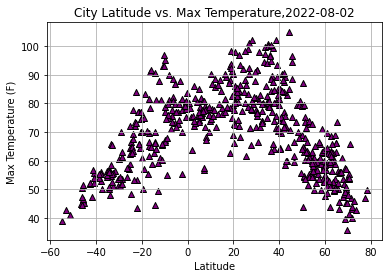

In [12]:
#Creating plot
#note random color and marker selections to get practice changing coloration and marker types in scatterplots
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker = "^", color = "purple",edgecolor = "black")
date=pd.to_datetime("today").date()
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature,{date}")
plt.savefig("..//output_data//Lat_vs_temp_plot")
plt.show()


## Latitude vs. Humidity Plot

The plot shows no discernable patterns between latitude and humidity


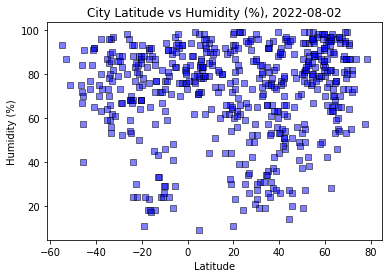

In [14]:
plt.scatter(pd.to_numeric(clean_city_data['Lat']).astype(float), pd.to_numeric(clean_city_data['Humidity']).astype(float), marker = "s",facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%), {date}")
print("The plot shows no discernable patterns between latitude and humidity")
plt.savefig("..//output_data//lat_vs_humid_plot")
plt.show()

## Latitude vs. Cloudiness Plot

The plot shows no relation of note between latitude and cloudiness


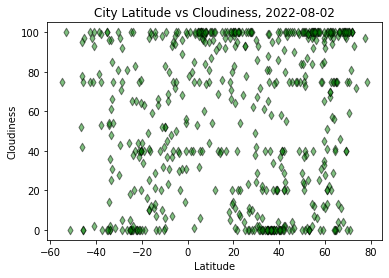

In [15]:
plt.scatter(pd.to_numeric(clean_city_data["Lat"]).astype(float), pd.to_numeric(clean_city_data["Cloudiness"]).astype(float), marker = "d",facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness, {date}")
print("The plot shows no relation of note between latitude and cloudiness")
plt.savefig("..//output_data//lat_vs_cloud_plot")
plt.show()


## Latitude vs. Wind Speed Plot

The plot shows no noticeable correlation between latitude and wind speed


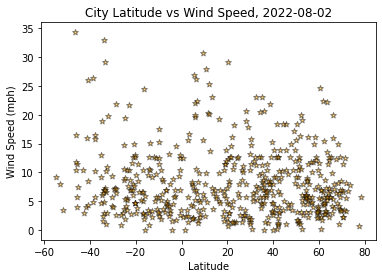

In [16]:
plt.scatter(pd.to_numeric(clean_city_data["Lat"]).astype(float), pd.to_numeric(clean_city_data["Wind Speed"]).astype(float),marker = "*", facecolors="orange", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed, {date}")
print("The plot shows no noticeable correlation between latitude and wind speed")
plt.savefig("..//output_data//lat_vs_windspeed_plot")
plt.show()

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
n_hemi = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]).astype(float) > 0, :]
s_hemi = clean_city_data.loc[pd.to_numeric(clean_city_data["Lat"]).astype(float) < 0, :]




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.47x + 90.09
The r-squared is: -0.6620795896656678
The regression equation displays a negative correlation.
Moving away from the equator lowers the temperature in the Northern Hemisphere


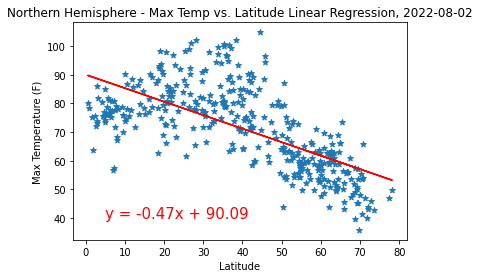

In [22]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
date=pd.to_datetime("today").date()
x_values = pd.to_numeric(n_hemi['Lat']).astype(float)
y_values = pd.to_numeric(n_hemi['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "*")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression, 2022-08-02")
print(f"The r-squared is: {rvalue}")
print("The regression equation displays a negative correlation.")
print("Moving away from the equator lowers the temperature in the Northern Hemisphere")
plt.savefig("..//output_data//north_max_temp_v_lat_plot")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.74x + 81.76
The r-squared is: 0.7519342500682126
The regression equation displays a positive correlation.
Moving closer to the equator increases the temperature in the southern hemisphere


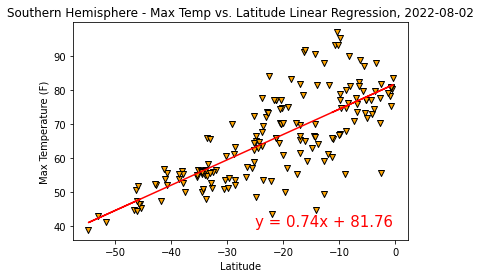

In [23]:
x_values = pd.to_numeric(s_hemi['Lat']).astype(float)
y_values = pd.to_numeric(s_hemi['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "v" ,facecolors="orange", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression, 2022-08-02')
print(f"The r-squared is: {rvalue}")
print("The regression equation displays a positive correlation.")
print("Moving closer to the equator increases the temperature in the southern hemisphere")
plt.savefig("..//output_data//south_max_temp_v_lat_plot")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.09x + 68.87
The r-squared is: 0.08672915514717748
The regression does not display much of a correlation between the data sets.


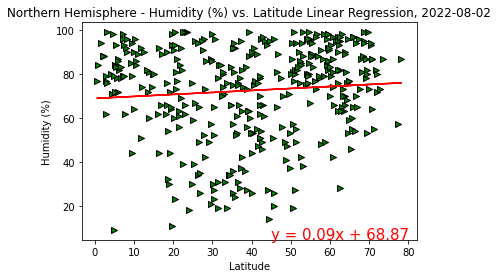

In [24]:
x_values = pd.to_numeric(n_hemi['Lat']).astype(float)
y_values = pd.to_numeric(n_hemi['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = ">", facecolors="green", edgecolors="black",)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression, 2022-08-02')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.savefig("..//output_data//north_humid_v_lat_plot")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.18x + 66.72
The r-squared is: -0.1133703347350952
The regression equation does not indicate any correlation between humidity and latitude in the southern hemisphere.


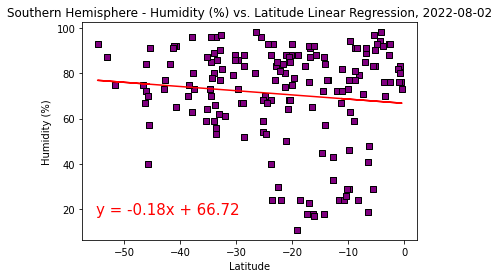

In [25]:
x_values = pd.to_numeric(s_hemi['Lat']).astype(float)
y_values = pd.to_numeric(s_hemi['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "s", facecolors="purple", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression, 2022-08-02')
print(f"The r-squared is: {rvalue}")
print("The regression equation does not indicate any correlation between humidity and latitude in the southern hemisphere.")
plt.savefig("..//output_data//south_humid_v_lat_plot")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.06x + 61.1
The r-squared is: -0.03088554978992883
The regression equation does not show a correlation between cloudiness and latitude in the northern hemisphere.


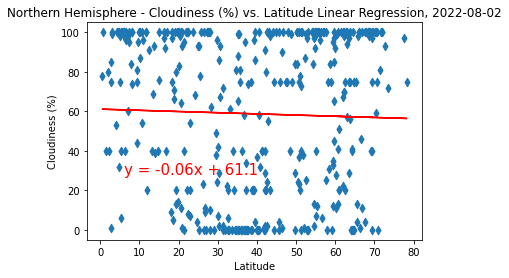

In [26]:
x_values = pd.to_numeric(n_hemi['Lat']).astype(float)
y_values = pd.to_numeric(n_hemi['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "d")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,28),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression, 2022-08-02')
print(f"The r-squared is: {rvalue}")
print("The regression equation does not show a correlation between cloudiness and latitude in the northern hemisphere.")
plt.savefig("..//output_data//north_cloud_v_lat_plot")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.1x + 45.96
The r-squared is: -0.03564977534480627
The regression equations does not show a correlation between cloudiness and latitude in the southern hemisphere.


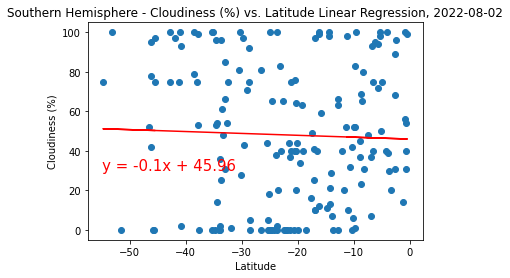

In [27]:
x_values = pd.to_numeric(s_hemi['Lat']).astype(float)
y_values = pd.to_numeric(s_hemi['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "o")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression, 2022-08-02')
print(f"The r-squared is: {rvalue}")
print("The regression equations does not show a correlation between cloudiness and latitude in the southern hemisphere.")
plt.savefig("..//output_data//south_cloud_v_lat_plot")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.03x + 9.33
The r-squared is: -0.10984679383853187
The regression equation does not display a correlation between wind speed and latitude in the northern hemisphere.


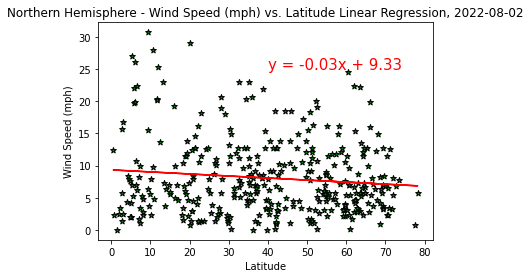

In [28]:
x_values = pd.to_numeric(n_hemi['Lat']).astype(float)
y_values = pd.to_numeric(n_hemi['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "*", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression, 2022-08-02')
print(f"The r-squared is: {rvalue}")
print("The regression equation does not display a correlation between wind speed and latitude in the northern hemisphere.")
plt.savefig("..//output_data//north_windspeed_v_lat_plot")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.11x + 5.84
The r-squared is: -0.2316039501891098
The regression equation does not show a correlation between wind speed and latitude in the southern hemisphere.


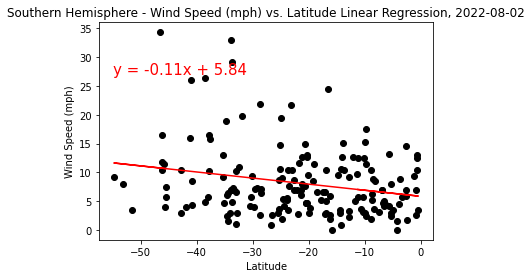

In [29]:
x_values = pd.to_numeric(s_hemi['Lat']).astype(float)
y_values = pd.to_numeric(s_hemi['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,marker = "o", facecolors="black", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,27),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression, 2022-08-02')
print(f"The r-squared is: {rvalue}")
print("The regression equation does not show a correlation between wind speed and latitude in the southern hemisphere.")
plt.savefig("..//output_data//south_windspeed_v_lat_plot")
plt.show()
